November 2020
<img width=300 src="./fig/ladisk.png">

<center>Prof. dr. Janko Slavič</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Initially use `fr` as integer multiplicator of `1/T` and without noise. Follow by non-integer, noise, and add windows (show amplitude normalization). (Optional: signal below quantization level + noise)

In [2]:
T = 1
N = 1000
fr = 10.452
t, dt = np.linspace(0, T, N, endpoint=False, retstep=True)
angle = 0.5
x = 1.01*np.cos(2*np.pi*fr*t+angle)
#x[np.logical_or(-w*T*0.25>t,t>w*T*0.25)]=0.
x = x+10*(np.random.rand(N)-0.5)

# Digital quantization

In [3]:
def get_quantized(x, bits = 4, adc_range = (-2, 2)):
    x2 = x.copy()
    lo, hi = adc_range
    x2[x<=lo] = lo
    x2[x>=hi] = hi
    delta = (hi - lo) / (2**(bits)-1)
    qnt = lo+delta*np.floor((x2-lo)/delta)
    print(delta)
    return qnt#delta*np.floor(x/delta)

In [4]:
bits = 2
levels = 2**bits
x2 = get_quantized(x, bits = bits, adc_range=(-4, 4))
w = np.hanning(len(x))
#w = np.ones(len(x))
#x2 = w*x2

2.6666666666666665


In [5]:
levels

4

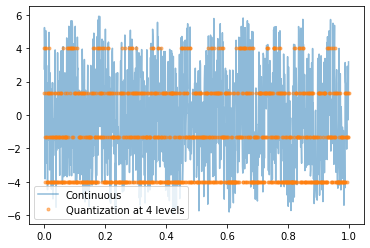

In [6]:
plt.plot(t, x, label='Continuous', alpha=0.5)
plt.plot(t, x2, '.', label=f'Quantization at {levels} levels', alpha=0.5)
plt.legend();

In [7]:
N_ = N
N_ = np.sum(w) # v primeru okna
X1=2*np.fft.rfft(x)/N
X2=2*np.fft.rfft(x2)/N_

f1=np.fft.rfftfreq(len(x),dt)

Amplitude spectra

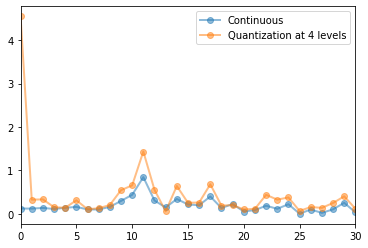

In [8]:
a = plt.semilogy
a = plt.plot
a(f1, np.abs(X1), 'o-', label='Continuous', alpha=0.5, lw=2)
a(f1, np.abs(X2), 'o-', label=f'Quantization at {levels} levels', alpha=0.5, lw=2)
#plt.ylim(1e-5, 1.1)
plt.xlim(0, 30)
plt.legend();

Phase spectra

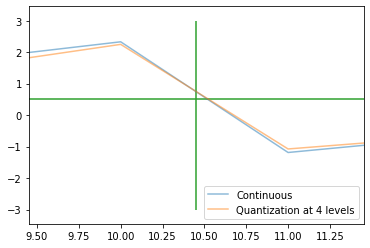

In [9]:
plt.plot(f1, np.angle(X1), label='Continuous', alpha=0.5)
plt.plot(f1, np.angle(X2), label=f'Quantization at {levels} levels', alpha=0.5)
plt.vlines(fr, -3, 3, 'C2')
plt.hlines(angle, fr-1, fr+1, 'C2')
#plt.ylim(, 1.)
plt.xlim(fr-1, fr+1)
plt.legend(loc='lower right');

# SNR - signal to noise ratio

Definition:

$SNR=10\log_{10}\frac{\sigma_{s}^2}{\sigma_{n}^2}=20\log_{10}\frac{\sigma_{s}}{\sigma_{n}}$

$\sigma_{s}$ - signal standard deviation

$\sigma_{n}$ - noise standard deviation

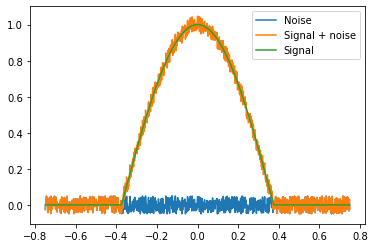

In [10]:
T = 1.5
N = 1000
w = 0.5
t = np.linspace(-T/2, T/2, N, endpoint=False)
dt = t[1] - t[0]
x = np.cos(2*np.pi*t/(2*w*T))
x[np.logical_or(-w*T*0.5 > t , t > w*T*0.5)] = 0.
n = 0.1*(np.random.rand(N)-0.5)
plt.plot(t, n, label='Noise')
plt.plot(t, x+n, label='Signal + noise')
plt.plot(t, x, label='Signal')
plt.legend();

In [11]:
def SNR(signal, noise):
    return 10*np.log10(signal**2/noise**2)

In [12]:
SNR(.01,1)

-40.0

In [13]:
SNR(np.std(x), np.std(n))

22.592336163413748

# Sampling

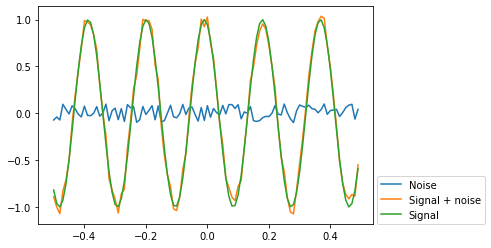

In [14]:
T = 1.
N = 100
f = 5.3
t, dt = np.linspace(-T/2, T/2, N, endpoint=False, retstep=True)
x = np.cos(2*f*np.pi*t+0.33)
n = .2*(np.random.rand(len(t))-0.5)
plt.plot(t, n, label='Noise')
plt.plot(t, x+n, label='Signal + noise')
plt.plot(t, x, label='Signal')
plt.legend(loc=(1.01, 0));

Frekvenca vzorčenja

In [15]:
fs=1/dt
fs/2

50.0

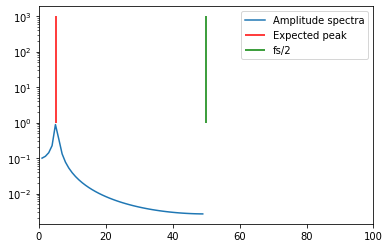

In [16]:
X1=np.fft.fft(x)*2/len(x)

f1=np.fft.fftfreq(len(x),dt)
plt.semilogy(f1[f1>0], np.abs(X1[f1>0]), label='Amplitude spectra');
plt.vlines(f, 1, 1000, 'r', label='Expected peak')
plt.vlines(fs/2, 1, 1000, 'g', label='fs/2')
plt.xlim(0, fs/2+50)
plt.legend();